# House Price Prediction
the House Price Prediction Challenge, you will test your regression skills by designing an algorithm to accurately predict the house prices in India. Accurately predicting house prices can be a daunting task. The buyers are just not concerned about the size(square feet) of the house and there are various other factors that play a key role to decide the price of a house/property. It can be extremely difficult to figure out the right set of attributes that are contributing to understanding the buyer's behavior as such. This dataset has been collected across various property aggregators across India. In this competition, provided the 12 influencing factors your role as a data scientist is to predict the prices as accurately as possible.

## Data Description:

29451 rows x 12 columns

## Attributes Description:

Column       |   Description 

POSTED_BY    |   	Category marking who has listed the property

UNDER_CONSTRUCTION   |   	Under Construction or Not

RERA         |   	Rera approved or Not

BHK_NO       |   	Number of Rooms

BHKORRK      |   	Type of property

SQUARE_FT    |   	Total area of the house in square feet

READYTOMOVE  |   	Category marking Ready to move or Not

RESALE       |   	Category marking Resale or not

ADDRESS      |   	Address of the property

LONGITUDE    |   	Longitude of the property

LATITUDE     |    	Latitude of the property


## import the essential libraries

In [9]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read the dataset

In [13]:
df = pd.read_csv('train.csv') 

In [14]:
# show the first five rows
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


## EDA

In [4]:
# disply some information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [15]:
df.shape#display number rows and number of colum 

(29451, 12)

As we see above we don`t have any null value and we will check again

In [5]:
df.isna().sum() # cheak is not missing value or serus

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [6]:
# show some statistics summary
df.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


we can see that the area has an outlier we need to handle it

In [17]:
df = df[df['SQUARE_FT']<= 1.550688e+03]#  

In [18]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [19]:
df.shape 

(22088, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22088 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              22088 non-null  object 
 1   UNDER_CONSTRUCTION     22088 non-null  int64  
 2   RERA                   22088 non-null  int64  
 3   BHK_NO.                22088 non-null  int64  
 4   BHK_OR_RK              22088 non-null  object 
 5   SQUARE_FT              22088 non-null  float64
 6   READY_TO_MOVE          22088 non-null  int64  
 7   RESALE                 22088 non-null  int64  
 8   ADDRESS                22088 non-null  object 
 9   LONGITUDE              22088 non-null  float64
 10  LATITUDE               22088 non-null  float64
 11  TARGET(PRICE_IN_LACS)  22088 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.2+ MB


In [10]:
df.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,22088.000000,22088.000000,22088.000000,22088.000000,22088.000000,22088.000000,22088.000000,22088.000000,22088.000000
mean,0.190194,0.304645,2.094305,1015.204944,0.809806,0.927472,20.994264,76.841554,69.580939
std,0.392463,0.460267,0.662925,298.104302,0.392463,0.259366,5.896253,10.289662,76.113703
min,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,-37.713008,-121.761248,0.290000
25%,0.000000,0.000000,2.000000,797.571417,1.000000,1.000000,18.476532,73.733330,33.000000
50%,0.000000,0.000000,2.000000,1049.818890,1.000000,1.000000,19.894104,77.333100,50.000000
75%,0.000000,1.000000,2.000000,1250.000000,1.000000,1.000000,25.578105,78.418890,80.000000
max,1.000000,1.000000,20.000000,1550.587931,1.000000,1.000000,59.912884,144.957843,4200.000000


As we see now we remove all outlier

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


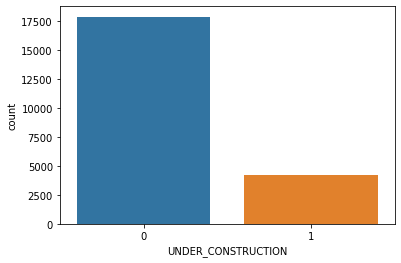

In [11]:
# how many house is under construction?
sns.countplot(df.UNDER_CONSTRUCTION)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


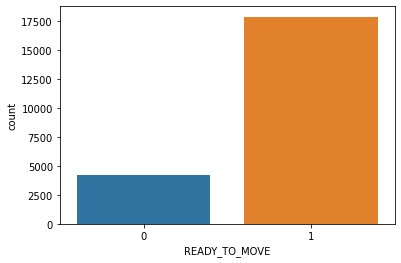

In [12]:
# how many person on the house READY_TO_MOVE?
sns.countplot(df.READY_TO_MOVE)

In [13]:
df.BHK_OR_RK.value_counts()

BHK    22064
RK        24
Name: BHK_OR_RK, dtype: int64

As we see most of value BHK so we can ignore this column because there is no information we can get with column almost have one value

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


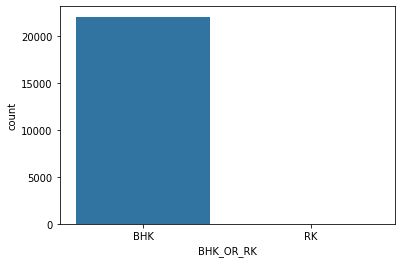

In [14]:
sns.countplot(df.BHK_OR_RK)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


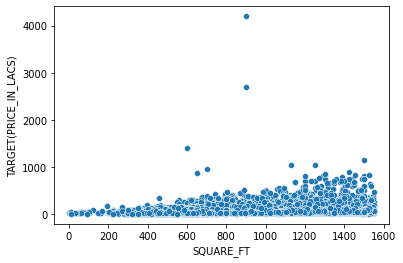

In [15]:
#the relation between area and price
sns.scatterplot(df['SQUARE_FT'],df['TARGET(PRICE_IN_LACS)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


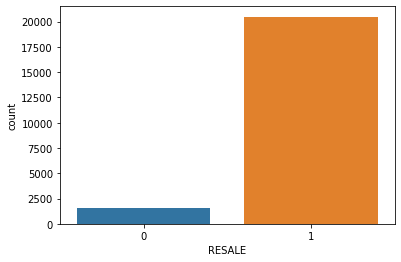

In [16]:
# How many house get RESALE efore?
sns.countplot(df.RESALE) #1/ 

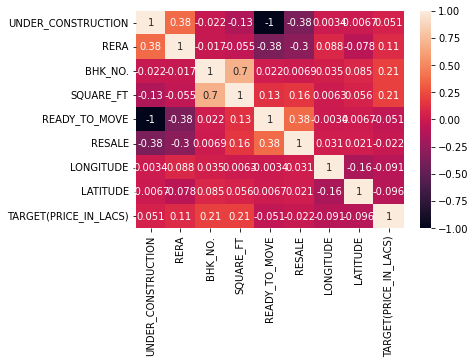

In [17]:
# the corroletion between variable
sns.heatmap(df.corr(),annot=True)   

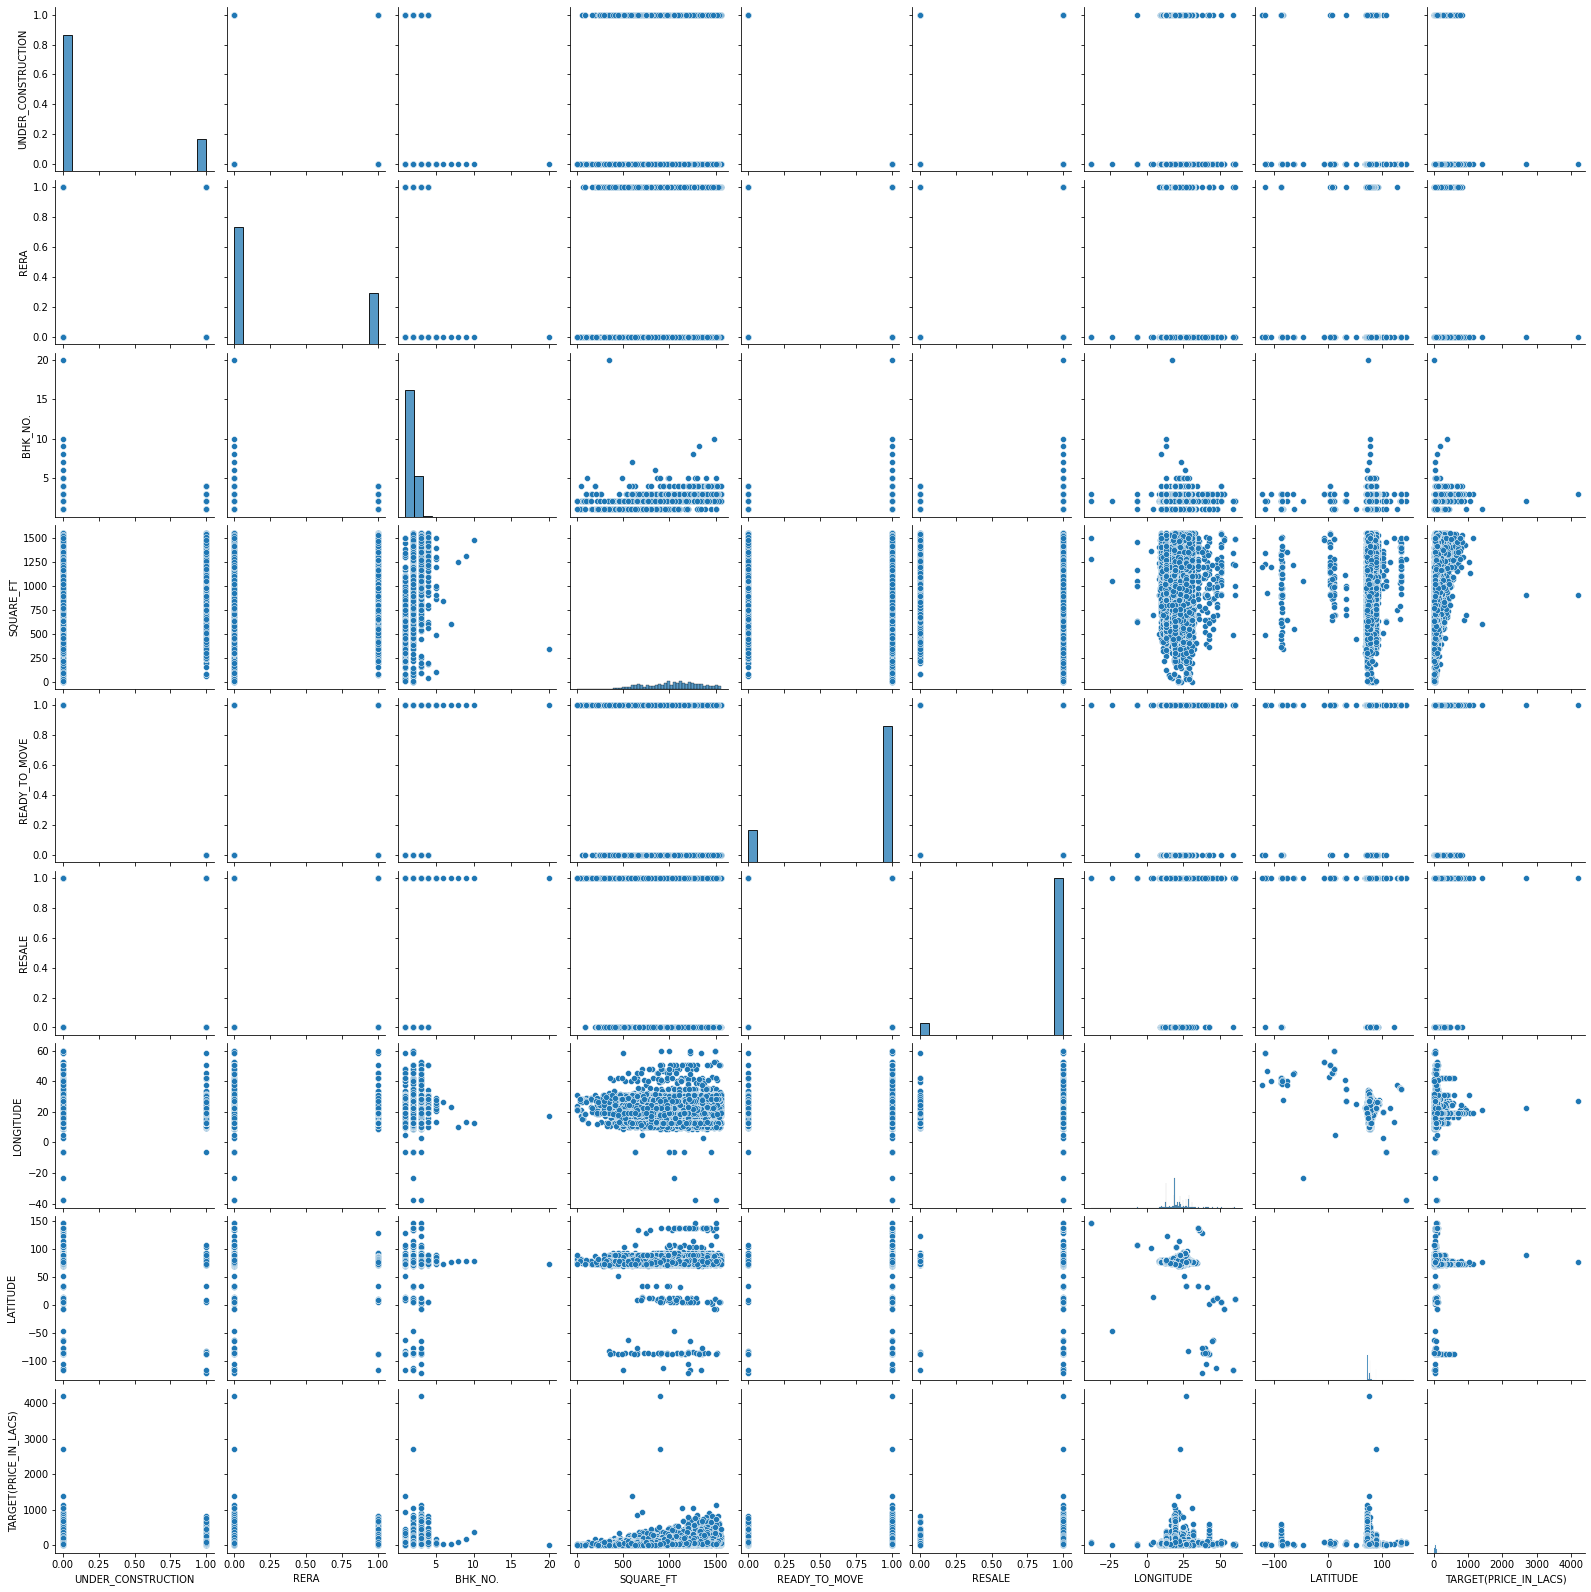

In [18]:
# see the visual 
sns.pairplot(df)

## select the important feature

In [19]:
# after caring and know about data I decide to drop Address and BHK_OR_RK
df.drop(columns=['BHK_OR_RK','ADDRESS'],axis=1,inplace=True)

In [20]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,1300.236407,1,1,12.969910,77.597960,55.0
1,Dealer,0,0,2,1275.000000,1,1,12.274538,76.644605,51.0
2,Owner,0,0,2,933.159722,1,1,12.778033,77.632191,43.0
3,Owner,0,1,2,929.921143,1,1,28.642300,77.344500,62.5
4,Dealer,1,0,2,999.009247,0,1,22.592200,88.484911,60.5


In [21]:
# convert all string to number using dummy variable
df= pd.get_dummies(df)

## split data into train test

In [22]:
X = df.drop('TARGET(PRICE_IN_LACS)',axis=1)
y=df['TARGET(PRICE_IN_LACS)']# 
X.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner
0,0,0,2,1300.236407,1,1,12.969910,77.597960,0,0,1
1,0,0,2,1275.000000,1,1,12.274538,76.644605,0,1,0
2,0,0,2,933.159722,1,1,12.778033,77.632191,0,0,1
3,0,1,2,929.921143,1,1,28.642300,77.344500,0,0,1
4,1,0,2,999.009247,0,1,22.592200,88.484911,0,1,0


In [23]:
y

0        55.0
1        51.0
2        43.0
3        62.5
4        60.5
         ... 
29445    40.0
29447    16.0
29448    27.1
29449    67.0
29450    27.8
Name: TARGET(PRICE_IN_LACS), Length: 22088, dtype: float64

In [24]:
from sklearn.model_selection import train_test_split #use trin80% and test20%
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

## Applying Machine learning Models

In [25]:
# we will see Linear regression
from sklearn.linear_model import LinearRegression #first model 
from sklearn.metrics import mean_squared_error #m
lr = LinearRegression()
lr.fit(X_train,y_train) # 
print(lr.score(X_test,y_test)) # ا
y_pred = lr.predict(X_test) # value prediction
print(mean_squared_error(y_test,y_pred)) 

0.1973814080137496
3500.5336888261827


 as we see above the linear regression has low R square value we need to try other model

In [26]:
from sklearn.tree import  DecisionTreeRegressor #after the teast rsult decision the patter
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
print(dt.score(X_test,y_test))
y_pred = dt.predict(X_test)
print(mean_squared_error(y_test,y_pred))

0.4690630737578093
2315.62365426049


Applying random forest

In [27]:
from sklearn.ensemble import RandomForestRegressor 
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
print(rf.score(X_test,y_test))
y_pred = rf.predict(X_test)
print(mean_squared_error(y_test,y_pred))

0.7095394248102656
1266.8122055474564


In [28]:
from xgboost import XGBRegressor
boost = XGBRegressor()
boost.fit(X_train,y_train)
print(boost.score(X_test,y_test))
y_pred = boost.predict(X_test)
print(mean_squared_error(y_test,y_pred))

[13:46:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.6032833365521253
1730.2365771036043


In [31]:
scores= {'model':['lr','dt','rf','boost'],
         'score':[lr.score(X_test,y_test),dt.score(X_test,y_test),rf.score(X_test,y_test),boost.score(X_test,y_test)]
}

In [32]:
score = pd.DataFrame(scores)

In [33]:
score #linear regation dt= distain tree rf= randomfrisr 

,model,score
0,lr,0.197381
1,dt,0.469063
2,rf,0.709539
3,boost,0.603283


## conclusion:

Random forest is the best model is Random forest in the next step we will save the model to create a product to offer this product to some Housing Ministry** and the whole people who want to investment in houses